In [94]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
import matplotlib as mpl

start_date = '2000-01-01'
end_date = '2024-06-01'

mpl.rc('axes.spines', top=False, bottom=False, left=False, right=False)
mpl.rc('grid', linestyle=':', color='gray', alpha=0.5)

ticker = 'AAPL'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [101]:
features = ['^FVX','^TYX','^VIX','JPY=X','^GSPC','GC=F','AAPL']
exog = yf.download(
    features,
    start = start_date,
    end = end_date
)['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [103]:
log_return = exog.pct_change(fill_method = None)

In [104]:
log_return.dropna(inplace = True)

In [107]:
X_train = log_return[:'2019']
X_test = log_return['2020':]

In [109]:
n_states = 3
hmm_model = GaussianHMM(
    n_components=n_states, 
    covariance_type="full", 
    n_iter=1000,
    random_state = 42
)
hmm_model.fit(X_train.values)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000,
            random_state=42)

In [110]:
hidden_states = hmm_model.predict(X_test.values)

In [111]:
hmm_pred_prob = pd.DataFrame(
    hmm_model.predict_proba(X_train.values),
    index = X_train.index
)

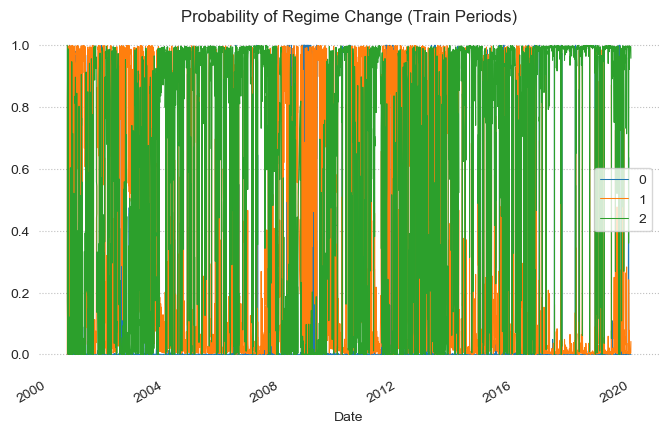

In [112]:
fig, ax = plt.subplots(figsize = (8, 5))
hmm_pred_prob.plot(lw = 0.75, ax = ax)
ax.xaxis.grid(False)
plt.title('Probability of Regime Change (Train Periods)')
plt.show()

In [113]:
hmm_pred_prob = pd.DataFrame(
    hmm_model.predict_proba(X_test.values),
    index = X_test.index
)

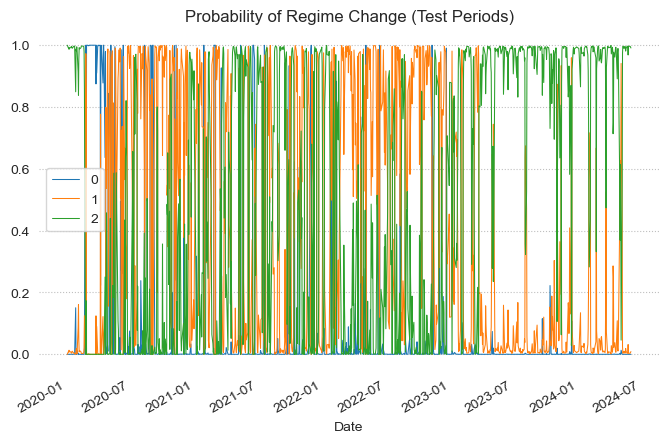

In [114]:
fig, ax = plt.subplots(figsize = (8, 5))
hmm_pred_prob.plot(lw = 0.75, ax = ax)
ax.xaxis.grid(False)
plt.title('Probability of Regime Change (Test Periods)')
plt.show()

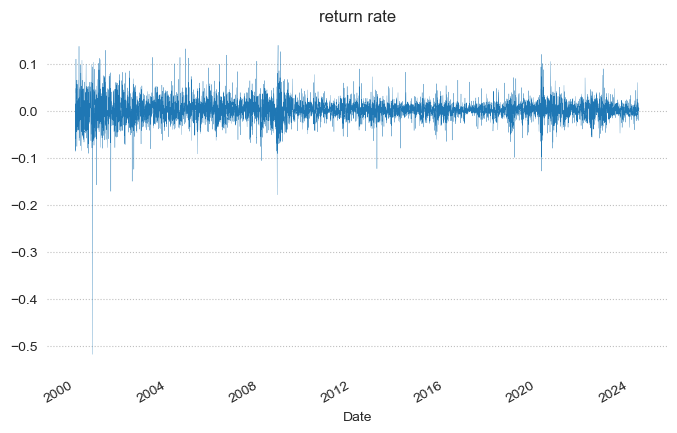

In [92]:
fig, ax = plt.subplots(figsize = (8, 5))
log_return.plot(lw = 0.2, ax = ax)
ax.xaxis.grid(False)
plt.title('return rate')
plt.show()